In [1]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm

Automatically created module for IPython interactive environment


In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# X(row,column)
X = X[y != 0, :2]    # X(Versicolor and Virginica, first two columns)
y = y[y != 0]        # y(Versicolor and Virginica)

#print(X)
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [5]:
n_sample = len(X)

np.random.seed(0)     # makes the random numbers predictable
order = np.random.permutation(n_sample)

X = X[order]
y = y[order].astype(np.float)


#print(X)
print(y)


[1. 2. 1. 2. 2. 2. 1. 2. 1. 2. 1. 1. 2. 1. 2. 2. 1. 1. 2. 2. 1. 2. 2. 1.
 1. 1. 1. 1. 2. 1. 1. 1. 2. 1. 2. 2. 1. 1. 2. 2. 2. 1. 1. 2. 2. 1. 1. 1.
 2. 2. 1. 2. 1. 2. 2. 2. 2. 1. 2. 1. 2. 2. 1. 1. 2. 2. 2. 1. 1. 2. 1. 2.
 1. 2. 1. 2. 1. 1. 1. 2. 1. 2. 1. 1. 2. 2. 1. 2. 2. 1. 1. 1. 2. 1. 2. 2.
 2. 2. 1. 1.]


In [6]:
# divide the data into "training" and "testing" sets

# We use "model_selection" library of the Scikit-Learn, which contains the "train_test_split" method 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# print(X_train)

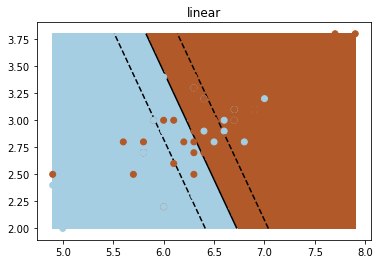

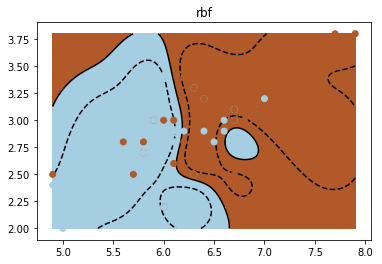

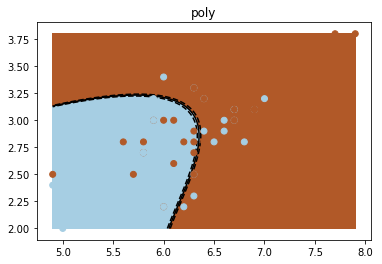

In [7]:
# fit the model
for fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none', zorder=10)

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()